In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
inc = pd.read_csv('brazil_monthly_income_updated.csv')
inc.head()

,year,quarter,job_type,state,value
0,2012,Q1,Directors and managers,Rondônia,2232.0
1,2012,Q1,Directors and managers,Acre,3048.0
2,2012,Q1,Directors and managers,Amazonas,3787.0
3,2012,Q1,Directors and managers,Roraima,3450.0
4,2012,Q1,Directors and managers,Pará,2455.0


In [34]:
pd.options.display.max_rows = 200
inc.groupby(['job_type','year'])['value'].sum()

job_type                                                                        year
Administrative support workers                                                  2012    128721.0
                                                                                2013    139963.0
                                                                                2014    148891.0
                                                                                2015    159033.0
                                                                                2016    174255.0
                                                                                2017    183226.0
                                                                                2018    191348.0
                                                                                2019    197765.0
Directors and managers                                                          2012    324731.0
                                          

In [35]:
tourism = pd.read_csv('brazil_tourism_jobs.csv')
tourism.head()

,year,month,region,state,job_type,jobs
0,2006,1,Centro-Oeste,Distrito Federal,Alojamento,2647
1,2006,1,Centro-Oeste,Distrito Federal,Alimentação,5026
2,2006,1,Centro-Oeste,Distrito Federal,Transporte Terrestre,5400
3,2006,1,Centro-Oeste,Distrito Federal,Transporte Aquaviário,0
4,2006,1,Centro-Oeste,Distrito Federal,Transporte Aéreo,637


In [40]:
tourism.groupby(['job_type','year'])['jobs'].sum()

job_type                year
Agência de Viagem       2006     437504
                        2007     459659
                        2008     500367
                        2009     527161
                        2010     577314
                        2011     638402
                        2012     687572
                        2013     699918
                        2014     694826
                        2015     668720
                        2016     635124
                        2017     635454
                        2018     637273
Alimentação             2006    2148941
                        2007    2485402
                        2008    2809067
                        2009    3087867
                        2010    3346637
                        2011    3652449
                        2012    3930195
                        2013    3949869
                        2014    4073611
                        2015    4300134
                        2016    4462354
           

### Can try each of these analysis (Brazil excluding Rio) vs (Rio) vs (Rio, São Paolo and Minas Gerais) 

In [51]:
inc_break = pd.read_csv('brazil_monthly_income_breakdowns.csv')
inc_break = inc_break.iloc[:,0:3]
inc_break.head()

,Job Type,Year,Income
0,Administrative support workers,2012.0,128721.0
1,Administrative support workers,2013.0,139963.0
2,Administrative support workers,2014.0,148891.0
3,Administrative support workers,2015.0,159033.0
4,Administrative support workers,2016.0,174255.0


In [52]:
inc_break_asw = inc_break[inc_break['Job Type'] == 'Administrative support workers']
inc_break_asw

,Job Type,Year,Income
0,Administrative support workers,2012.0,128721.0
1,Administrative support workers,2013.0,139963.0
2,Administrative support workers,2014.0,148891.0
3,Administrative support workers,2015.0,159033.0
4,Administrative support workers,2016.0,174255.0
5,Administrative support workers,2017.0,183226.0
6,Administrative support workers,2018.0,191348.0
7,Administrative support workers,2019.0,197765.0


In [56]:
import seaborn as sns
sns.set_style('darkgrid')

In [106]:
visits = pd.read_csv('brazil_international_arrivals_updated.csv')
visits.head()

,year,month,country,value,In South America
0,2007,1,África do Sul,3585,0
1,2007,1,Alemanha,26011,0
2,2007,1,Angola,4056,0
3,2007,1,Arábia Saudita,0,0
4,2007,1,Argentina,269536,1


In [107]:
visits_SA = visits[visits['In South America'] == 1]
visits_NSA = visits[visits['In South America'] == 0]

In [108]:
visits['value'].head()

0      3585
1     26011
2      4056
3         0
4    269536
Name: value, dtype: int64

In [109]:
visits.groupby(['In South America','year'])['value'].sum()

In South America  year
0                 2007    3111780
                  2008    2979708
                  2009    2706865
                  2010    2777193
                  2011    2804397
                  2012    2854324
                  2013    2876589
                  2014    3296223
                  2015    2885489
                  2016    2845352
                  2017    2476443
                  2018    2570778
1                 2007    1914054
                  2008    2070391
                  2009    2095352
                  2010    2384186
                  2011    2628957
                  2012    2822519
                  2013    2936753
                  2014    3133629
                  2015    3420349
                  2016    3701344
                  2017    4112327
                  2018    4050598
Name: value, dtype: int64

In [121]:
visits_plt = pd.read_csv('Rio_visits_breakdown_plotting.csv')
NSA = visits_plt.iloc[:,1]
SA = visits_plt.iloc[:,2]

<IPython.core.display.Javascript object>


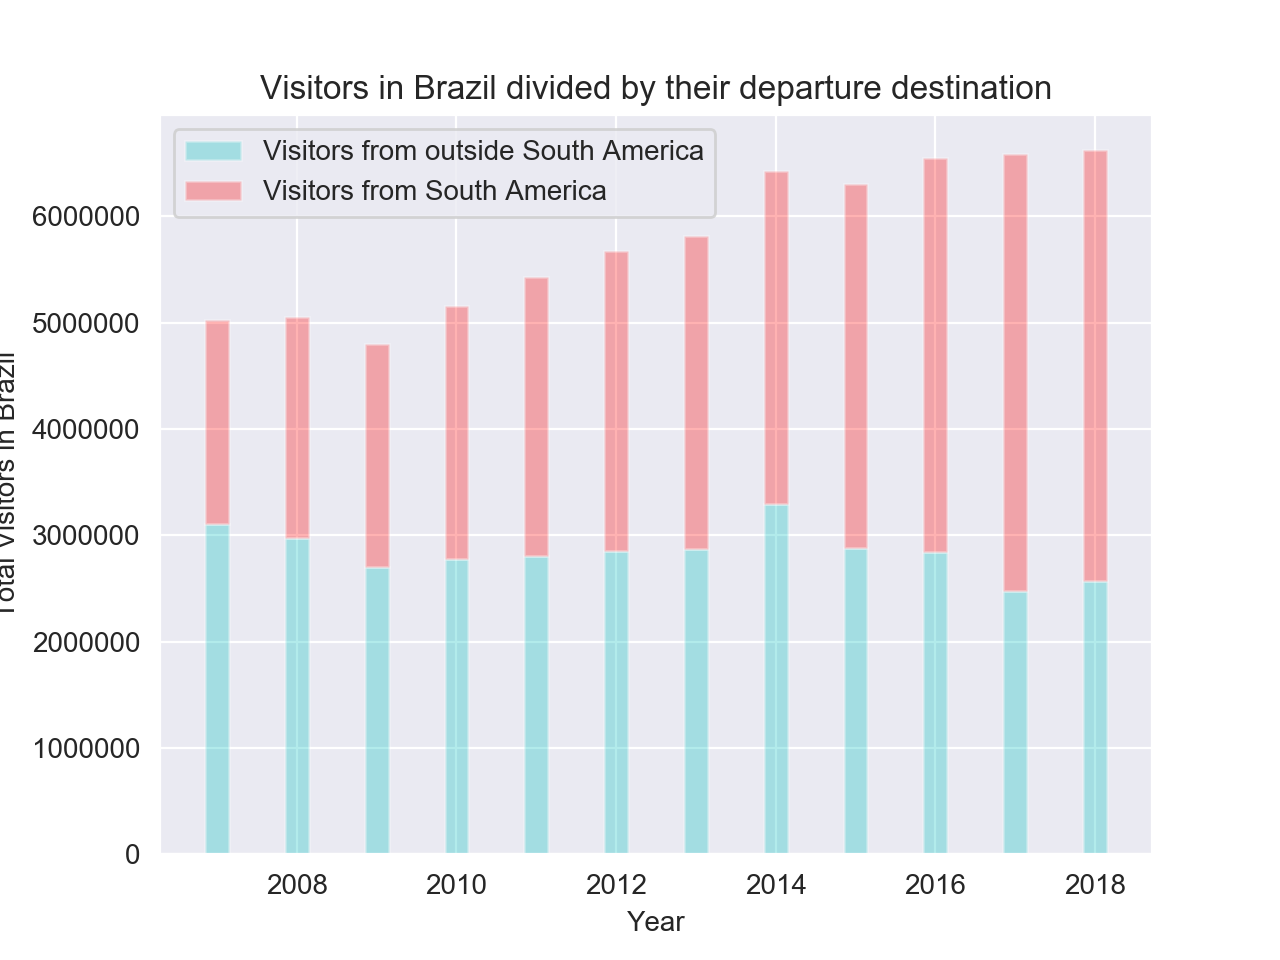

Text(0.5, 1.0, 'Visitors in Brazil divided by their departure destination')

In [183]:
plt.figure()
xvals = range(2007,2019)
plt.bar(xvals, NSA, width = 0.3, color='c', alpha = 0.3) 
plt.bar(xvals, SA, width = 0.3, color = u'r', alpha=0.3, bottom = NSA)
plt.legend(['Visitors from outside South America','Visitors from South America'],loc=2)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Total Visitors in Brazil')
ax.set_title('Visitors in Brazil divided by their departure destination')

## Visitors from outside South America are actually less during the Olympic Period
## Over the period of time, number of visitors from South America is increasing quite rapidly

In [168]:
gdp_neighbours = pd.read_csv('brazil_gdp_plot.csv')
gdp_neighbours.head()

,state,region,year,value,Increment in GDP
0,Minas Gerais,Noroeste de Minas,2002,1946581.87,NaN
1,Minas Gerais,Noroeste de Minas,2003,2458158.21,26.280751
2,Minas Gerais,Noroeste de Minas,2004,2816065.04,14.559959
3,Minas Gerais,Noroeste de Minas,2005,3122131.03,10.868570
4,Minas Gerais,Noroeste de Minas,2006,3068414.31,-1.720515


In [173]:
a = gdp_neighbours.groupby(['state','year'])['value'].sum()

In [176]:
a

state           year
Minas Gerais    2002    1.240711e+08
                2003    1.441891e+08
                2004    1.718709e+08
                2005    1.883644e+08
                2006    2.126595e+08
                2007    2.403552e+08
                2008    2.786076e+08
                2009    2.874438e+08
                2010    3.511234e+08
                2011    4.001247e+08
                2012    4.422828e+08
                2013    4.880049e+08
                2014    5.166340e+08
                2015    5.193312e+08
                2016    5.448105e+08
                2017    5.761991e+08
Rio de Janeiro  2002    1.843109e+08
                2003    2.026408e+08
                2004    2.412067e+08
                2005    2.698301e+08
                2006    2.997382e+08
                2007    3.236983e+08
                2008    3.782858e+08
                2009    3.916509e+08
                2010    4.498581e+08
                2011    5.127679e+08
                2

In [179]:
gdp_neighbours_plt = pd.read_csv('brazil_gdp_plot_imp_region.csv')
gdp_neighbours_plt.iloc[1:16,5]

1     16.21
2     19.20
3      9.60
4     12.90
5     13.02
6     15.91
7      3.17
8     22.15
9     13.96
10    10.54
11    10.34
12     5.87
13     0.52
14     4.91
15     5.76
Name: Minas Gerais.1, dtype: float64

<IPython.core.display.Javascript object>


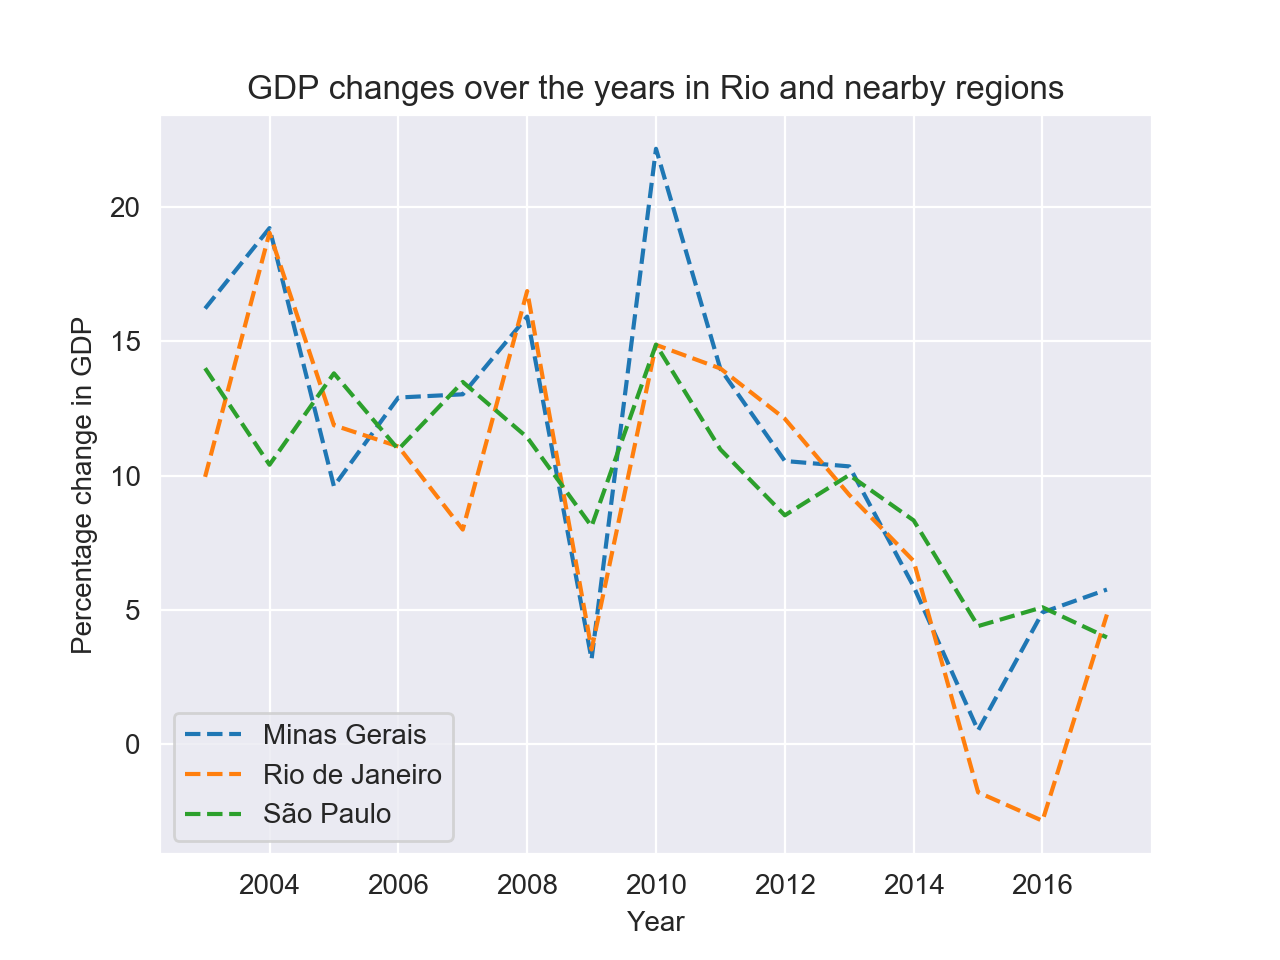

Text(0.5, 1.0, 'GDP changes over the years in Rio and nearby regions')

In [182]:
plt.figure()
plt.plot(range(2003,2018),gdp_neighbours_plt.iloc[1:16,5],'--')
plt.plot(range(2003,2018),gdp_neighbours_plt.iloc[1:16,6],'--')
plt.plot(range(2003,2018),gdp_neighbours_plt.iloc[1:16,7],'--')
plt.legend(['Minas Gerais','Rio de Janeiro','São Paulo'],loc=3)
x = plt.gca().xaxis 
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Percentage change in GDP')
ax.set_title('GDP changes over the years in Rio and nearby regions')

## The dwindling GDP of the nearby region and the host region can be one of the fundamental reason why the good effects of Olympics were never seen

## Following the Olympics in 2016, we do observe a rise in Rio but not in the adjacent major regions

In [185]:
inc_plt = pd.read_csv('brazil_Income_plot.csv')
inc_plt.head()

,Year,Administrative support workers,Directors and managers,Elementary occupations,Ill-defined occupations,"Members of the armed forces, police and military firefighters",Midlevel technicians and professionals,Plant and machine operators and assemblers,Science and intellection professions,"Service workers, sellers of trades and markets","Skilled workers in agriculture, forestry, hunting and fishing","Skilled workers, construction workers and artisans, mechanics and other crafts"
0,2012,128721,324731,67274,152686,302858,194465,120191,299736,111121,92003,111530
1,2013,139963,348169,73627,158084,323580,212574,129633,328233,119678,102149,122742
2,2014,148891,381439,80006,148916,348126,224171,141770,354840,129545,109365,131796
3,2015,159033,400568,85743,53226,386898,237517,153273,378933,135678,117503,136655
4,2016,174255,416453,91222,91576,430619,255518,163848,418831,144639,122027,142668


<IPython.core.display.Javascript object>


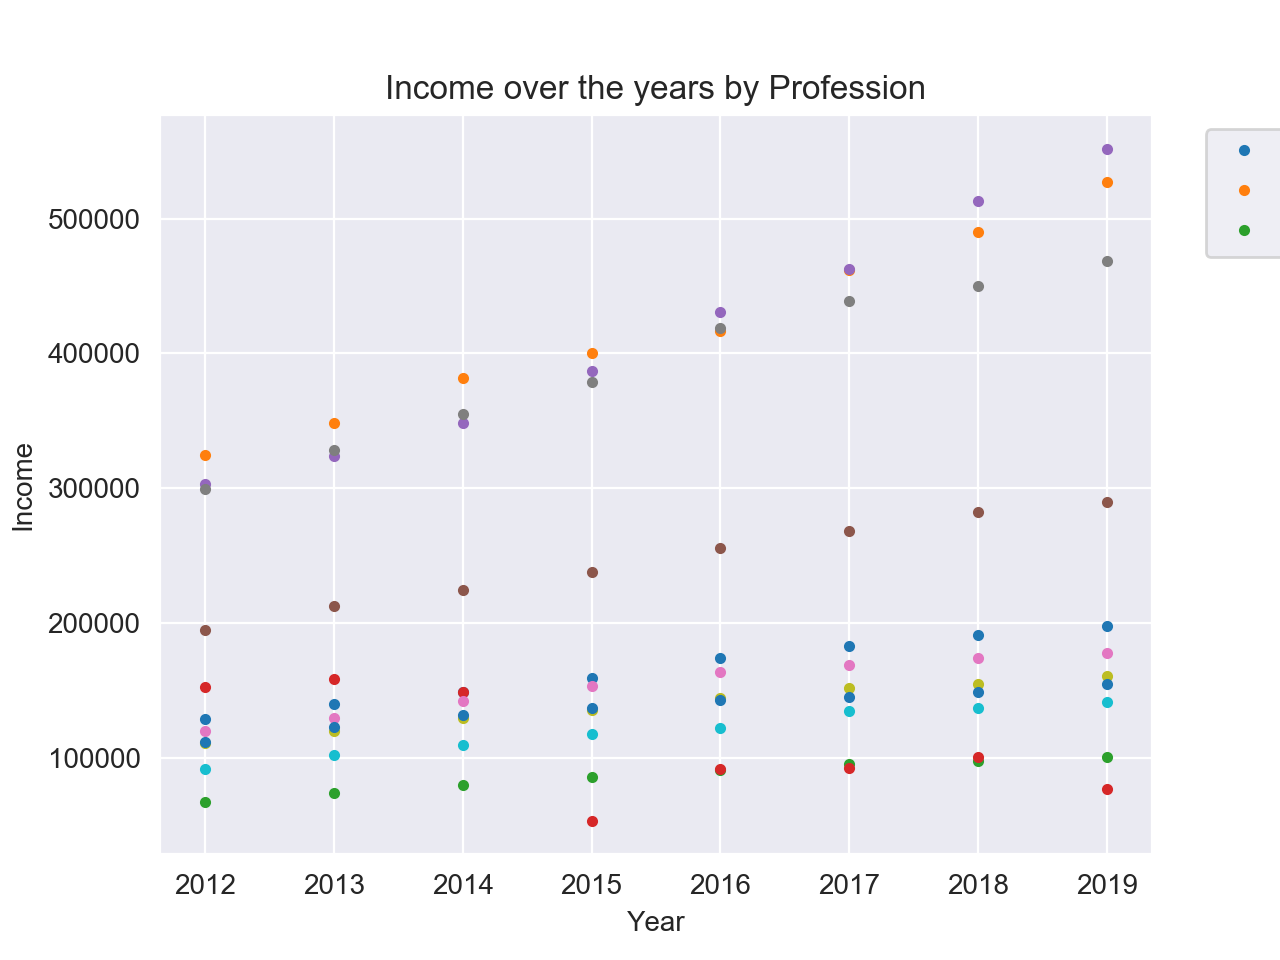

Text(0.5, 1.0, 'Income over the years by Profession')

In [197]:
plt.figure()
plt.plot(range(2012,2020),inc_plt.iloc[:,1],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,2],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,3],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,4],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,5],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,6],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,7],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,8],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,9],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,10],'.')
plt.plot(range(2012,2020),inc_plt.iloc[:,11],'.')
x = plt.gca().xaxis 
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Income')
ax.set_title('Income over the years by Profession')

## Other than ill-defined occupations, income has been steadily increasing

In [198]:
jobs = pd.read_csv('brazil_tourism_jobs.csv')
jobs.head()

,year,month,region,state,job_type,jobs
0,2006,1,Centro-Oeste,Distrito Federal,Alojamento,2647
1,2006,1,Centro-Oeste,Distrito Federal,Alimentação,5026
2,2006,1,Centro-Oeste,Distrito Federal,Transporte Terrestre,5400
3,2006,1,Centro-Oeste,Distrito Federal,Transporte Aquaviário,0
4,2006,1,Centro-Oeste,Distrito Federal,Transporte Aéreo,637


In [204]:
pd.options.display.max_rows = 600
jobs.groupby(['job_type','year'])['jobs'].sum()

job_type                year
Agência de Viagem       2006     437504
                        2007     459659
                        2008     500367
                        2009     527161
                        2010     577314
                        2011     638402
                        2012     687572
                        2013     699918
                        2014     694826
                        2015     668720
                        2016     635124
                        2017     635454
                        2018     637273
Alimentação             2006    2148941
                        2007    2485402
                        2008    2809067
                        2009    3087867
                        2010    3346637
                        2011    3652449
                        2012    3930195
                        2013    3949869
                        2014    4073611
                        2015    4300134
                        2016    4462354
           

## On a quick look, even for jobs, the numbers do not increase substantially during the Olympics or post Olympics time
## Rather sometimes, they seem to be decreasing